### u1421126
#### Decision Trees and Random Forests in Python

**Import Libraries**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
%matplotlib inline

**Get the Data**

In [42]:
df = pd.read_csv('kyphosis.csv')

In [43]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


**We are checking out a simple pairplot for this small dataset**

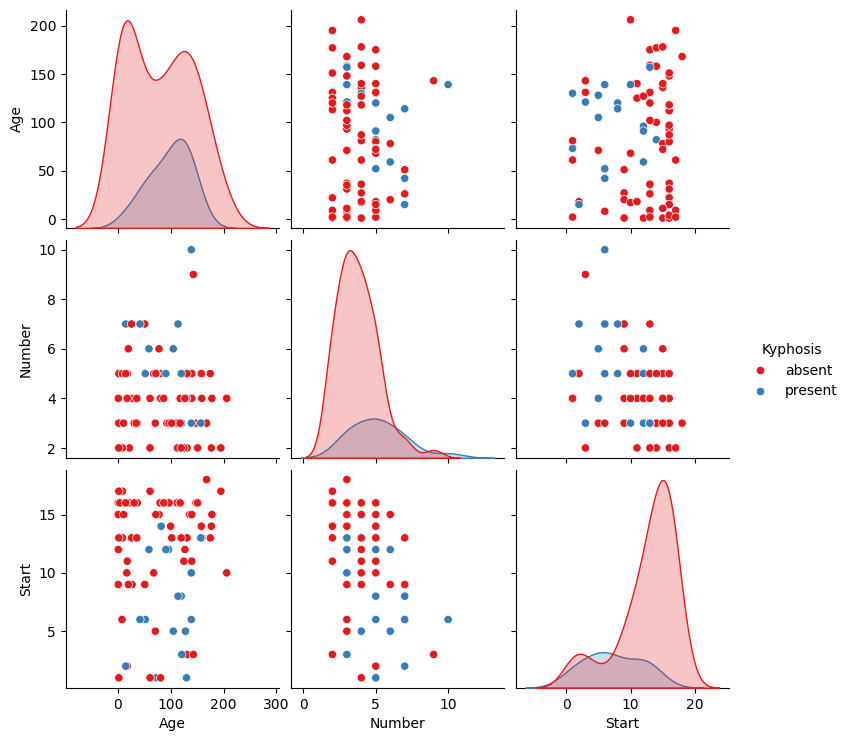

In [44]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

**Train Test Split**

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

**Decision Trees**

We'll start just by training a single decision tree.

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtree = DecisionTreeClassifier()

In [50]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

**Prediction and Evaluation**

In [51]:
predictions = dtree.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.90      0.82      0.86        22
     present       0.20      0.33      0.25         3

    accuracy                           0.76        25
   macro avg       0.55      0.58      0.55        25
weighted avg       0.82      0.76      0.78        25



In [54]:
print(confusion_matrix(y_test,predictions))

[[18  4]
 [ 2  1]]


**Random Forests**

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
rfc_pred = rfc.predict(X_test)

In [57]:
print(confusion_matrix(y_test,rfc_pred))

[[19  3]
 [ 1  2]]


In [58]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.95      0.86      0.90        22
     present       0.40      0.67      0.50         3

    accuracy                           0.84        25
   macro avg       0.68      0.77      0.70        25
weighted avg       0.88      0.84      0.86        25

